In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Activation

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import mean_absolute_error
import os

for dirname, _, filenames in os.walk('.\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\input\coin_Aave.csv
.\input\coin_BinanceCoin.csv
.\input\coin_Bitcoin.csv
.\input\coin_Cardano.csv
.\input\coin_ChainLink.csv
.\input\coin_Cosmos.csv
.\input\coin_CryptocomCoin.csv
.\input\coin_Dogecoin.csv
.\input\coin_EOS.csv
.\input\coin_Ethereum.csv
.\input\coin_Iota.csv
.\input\coin_Litecoin.csv
.\input\coin_Monero.csv
.\input\coin_NEM.csv
.\input\coin_Polkadot.csv
.\input\coin_Solana.csv
.\input\coin_Stellar.csv
.\input\coin_Tether.csv
.\input\coin_Tron.csv
.\input\coin_Uniswap.csv
.\input\coin_USDCoin.csv
.\input\coin_WrappedBitcoin.csv
.\input\coin_XRP.csv


In [2]:
data = 'input/coin_Bitcoin.csv'
dataset = pd.read_csv(data)
chosen_col = 'Close'
dataset.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


Выделим 80% датасета под обучение, 20% - тестовые данные

In [3]:
split_row = len(dataset) - int(0.2 * len(dataset))
train_data = dataset.iloc[:split_row]
test_data = dataset.iloc[split_row:]

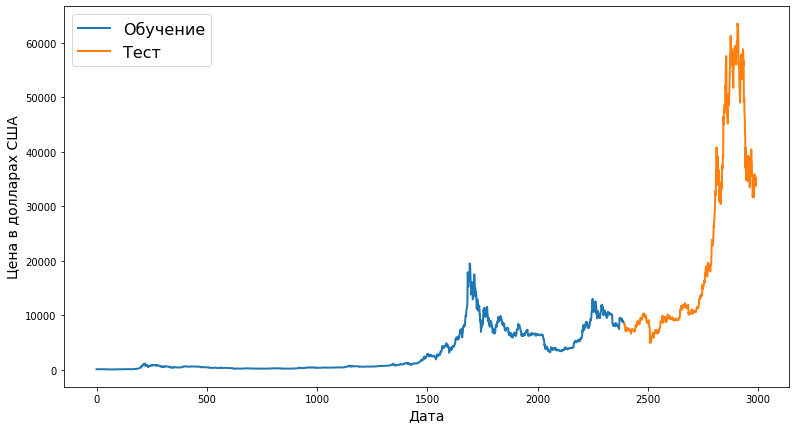

In [4]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train_data[chosen_col], label='Обучение', linewidth=2)
ax.plot(test_data[chosen_col], label='Тест', linewidth=2)
ax.set_ylabel('Цена в долларах США', fontsize=14)
ax.set_xlabel('Дата', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)
plt.show()

In [5]:
print(train_data[chosen_col].shape)

(2393,)


In [6]:
datacol = dataset.iloc[:, 7:8].values
traincol = train_data.iloc[:, 7:8].values
testcol = test_data.iloc[:, 7:8].values

shaped_data = np.reshape(datacol, (-1,1))
train_shaped = np.reshape(traincol, (-1,1))
test_shaped = np.reshape(testcol, (-1,1))

sc = MinMaxScaler(feature_range=(0,1))
sc.fit(shaped_data)

train_scaled_data = sc.transform(train_shaped)
test_scaled_data = sc.transform(test_shaped)

In [7]:
X = []
y = []
time_steps = 50

for i in range(time_steps, len(train_data)):
    X.append(train_scaled_data[i-time_steps:i,0])
    y.append(train_scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [8]:
class Custom_Loss(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()
    def call(self, y_true, y_pred):
        mm = tf.reduce_mean(y_true - y_pred)
        if mm > 0:
            return tf.reduce_mean(tf.square(y_true - y_pred))
        return -mm

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer='adam', loss='mse') #loss=Custom_Loss()

In [11]:
callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
59/59 [==============================] - 7s 59ms/step - loss: 4.7979e-04 - val_loss: 9.3843e-05
Epoch 2/100
59/59 [==============================] - 3s 46ms/step - loss: 1.0208e-04 - val_loss: 6.0964e-05
Epoch 3/100
59/59 [==============================] - 3s 46ms/step - loss: 9.8391e-05 - val_loss: 5.2524e-05
Epoch 4/100
59/59 [==============================] - 3s 46ms/step - loss: 7.8859e-05 - val_loss: 7.8529e-05
Epoch 5/100
59/59 [==============================] - 3s 46ms/step - loss: 7.4461e-05 - val_loss: 1.1660e-04
Epoch 6/100
59/59 [==============================] - 3s 46ms/step - loss: 7.8180e-05 - val_loss: 6.3435e-05
Epoch 7/100
59/59 [==============================] - 3s 48ms/step - loss: 7.0103e-05 - val_loss: 4.5134e-05
Epoch 8/100
59/59 [==============================] - 3s 48ms/step - loss: 6.4241e-05 - val_loss: 4.8032e-05
Epoch 9/100
59/59 [==============================] - 3s 48ms/step - loss: 6.1459e-05 - val_loss: 5.5603e-05
Epoch 10/100
59/59 [========

In [12]:
from tensorflow.keras.losses import MSE
X_testing = []
y_testing = []

for i in range(time_steps, len(test_data)):
    X_testing.append(test_scaled_data[i-time_steps:i,0])
    y_testing.append(test_scaled_data[i, 0])

X_testing, y_testing = np.array(X_testing), np.array(y_testing)
X_testing = np.reshape(X_testing, (X_testing.shape[0], X_testing.shape[1], 1))

predicted_price = model.predict(X_testing)
inv_price = sc.inverse_transform(predicted_price)
real_price = np.reshape(y_testing, (-1,1))
print('MSE:', np.mean(MSE(real_price, predicted_price)))
real_price = sc.inverse_transform(real_price)

MSE: 0.0007688672


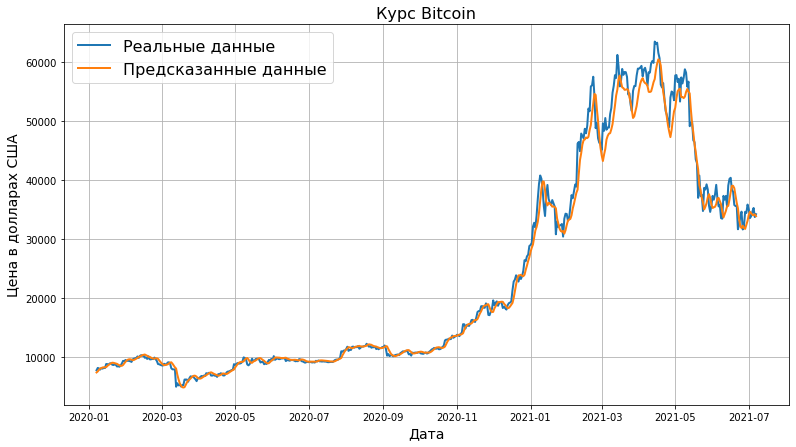

In [13]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(pd.to_datetime(test_data['Date'][50:]), real_price, label='Реальные данные', linewidth=2)
ax.plot(pd.to_datetime(test_data['Date'][50:]), inv_price, label='Предсказанные данные', linewidth=2)
ax.set_ylabel('Цена в долларах США', fontsize=14)
ax.set_xlabel('Дата', fontsize=14)
ax.set_title('Курс Bitcoin', fontsize=16)
ax.legend(loc='best', fontsize=16)
ax.grid()
plt.show()